In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df=pd.read_csv('F:\All_Certificates\Artificial_Intelligence\Machine learning\DeepLearning\Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
#Initializing the X & Y

X=df.drop(columns=['Exited'])
Y=df['Exited'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
# Build the Model

model=keras.Sequential([
    layers.Dense(11,activation='sigmoid',input_dim=11),
    layers.Dense(11,activation='sigmoid'),
    layers.Dense(1,activation='sigmoid'),
])



#model.summary()



In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(X_train,Y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 3s 16ms/step - loss: 0.6081 - accuracy: 0.6959 - val_loss: 0.5212 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 1s 9ms/step - loss: 0.5036 - accuracy: 0.7958 - val_loss: 0.4934 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.7958 - val_loss: 0.4843 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4801 - accuracy: 0.7958 - val_loss: 0.4748 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4696 - accuracy: 0.7958 - val_loss: 0.4648 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4586 - accuracy: 0.7958 - val_loss: 0.4546 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4477 - accuracy: 0.7958 - val_loss: 0.4456 - val_accuracy: 0.796

In [30]:
y_pred=model.predict(X_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.3178845 ],
       [0.34946993],
       [0.165997  ],
       ...,
       [0.11589444],
       [0.14594838],
       [0.31520447]], dtype=float32)

In [31]:
y_pred = y_pred.argmax(axis=-1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.7975

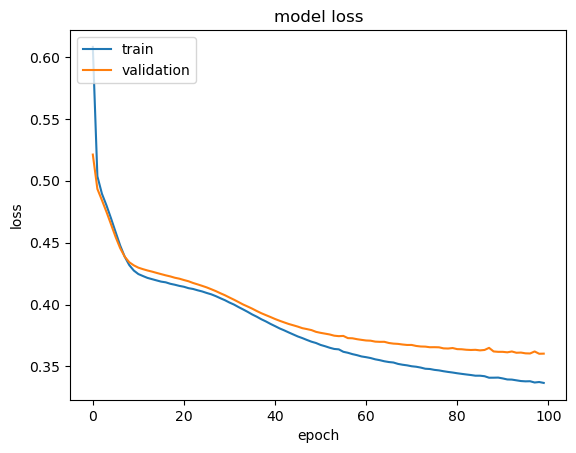

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
loss = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}')

12/63 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8698 

63/63 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8620
Test loss: [0.3372202217578888, 0.8619999885559082]


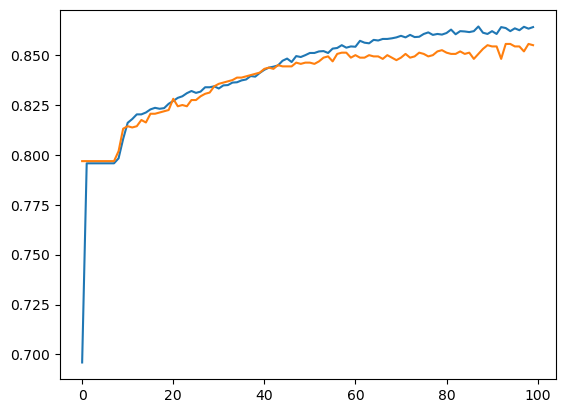

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])